<a href="https://colab.research.google.com/github/coletta1/VAIL/blob/main/autoencoder_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Followed tutorial from here: https://blog.keras.io/building-autoencoders-in-keras.html


In [11]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

from keras.callbacks import TensorBoard

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

#Normalize vals between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [4]:
#Train for 50 epochs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3839 - val_loss: 0.1917
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1816 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1492 - val_loss: 0.1326
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1304 - val_loss: 0.1191
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1186 - val_loss: 0.1108
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1108 - val_loss: 0.1052
Epoch 7/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1054 - val_loss: 0.1013
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1020 - val_loss: 0.0986
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0994 - val_loss: 0.0966
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0976 - val_lo

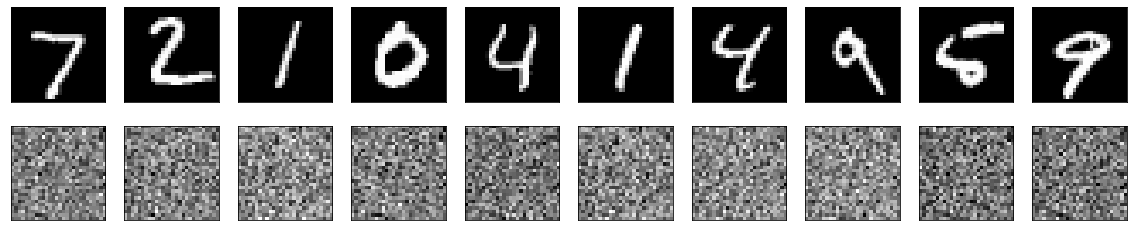

In [3]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
#Adding a sparsity constraint on the encoded representations
encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [7]:
#Trying a deep autoencoder
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 12ms/step - loss: 0.3920 - val_loss: 0.1942
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1858 - val_loss: 0.1613
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1573 - val_loss: 0.1428
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1410 - val_loss: 0.1314
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1307 - val_loss: 0.1234
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1235 - val_loss: 0.1178
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1179 - val_loss: 0.1136
Epoch 8/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1139 - val_loss: 0.1105
Epoch 9/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1110 - val_loss: 0.1084
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.109

In [9]:
#Convolutional Autoencoder
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [10]:
!tensorboard --logdir=/tmp/autoencoder

2021-03-02 16:41:18.001378: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [12]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3205 - val_loss: 0.1592
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1505 - val_loss: 0.1264
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1231 - val_loss: 0.1110
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1100 - val_loss: 0.1024
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1021 - val_loss: 0.0974
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0980 - val_loss: 0.0950
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0958 - val_loss: 0.0939
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0948 - val_loss: 0.0933
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0944 - val_loss: 0.0928
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0940 - val_loss: 0.0925

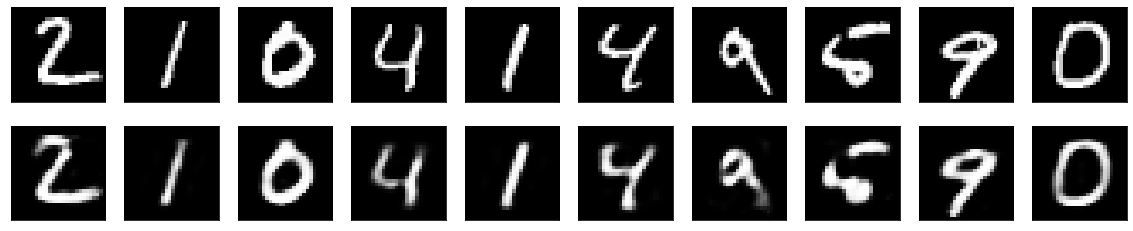

In [13]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()